#### Kanye West Twitter Analysis

Kanye West, known for his controversial persona, has always managed to capture media attention and public interest. His actions and statements often become subjects of intense discussions and heated debates. In this project, I aim to analyze tweets about Kanye West.

In the link provided below, you can find descriptions of Kanye West's behaviours during the period of October to December.
- https://www.forbes.com/sites/marisadellatto/2022/12/02/kanye-wests-anti-semitic-troubling-behavior-heres-everything-hes-said-in-recent-weeks/?sh=2268c07d6de3

I will analyze the attitudes of people (Twitter users) towards Kanye West before, during, and after the mentioned events.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import text2emotion as te

import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
df_before = pd.read_csv("tweets_before.csv")
df_during = pd.read_csv("tweets_during.csv")
df_after = pd.read_csv("tweets_after.csv")

df = pd.concat([df_before, df_during, df_after])

In [3]:
df.head()

Date  \
0  2022-08-01 23:59:32+00:00   
1  2022-08-01 23:59:00+00:00   
2  2022-08-01 23:57:27+00:00   
3  2022-08-01 23:56:06+00:00   
4  2022-08-01 23:54:07+00:00   

                                             Content  
0  Runaway by Kanye West is one of the greatest h...  
1  Kanye West feat Jay-Z x Swizz Beatz - Power RM...  
2  bandas:\nBMTH\nPlacebo\nThe Beatles\nBlur\nBRO...  
3  Erebus is never making beef casseroles or list...  
4  Id pay a rack to chill with @kanyewest for 5 m...

In [4]:
df.describe().transpose()

count unique                                               top freq
Date     41956  40055                         2022-12-01 23:59:38+00:00    8
Content  41956  39656  Future feat. Kanye West - KEEP IT BURNIN [Clean]   92

In [5]:
df.duplicated().sum()

5

In [6]:
df.isna().sum()

Date       0
Content    0
dtype: int64

In [7]:
df.shape

(41956, 2)

##### preprocessing

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df["Content"] = df["Content"].str.lower()
df["Content"] = df["Content"].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

def detect_language(text):
    try:
        language = detect(text)
        return language == 'en'
    except:
        return False

df = df[df["Content"].apply(lambda x: detect_language(x))]

print(df["Content"])

0        runaway by kanye west is one of the greatest h...
1                  kanye west feat x swizz beatz power rmx
2        bmth placebo the beatles blur brockhampton kan...
4          id pay a rack to chill with for minutes any day
5        the pissed put of coffee add of and of sour gu...
                               ...                        
11513    the song has been no child left behind by kany...
11514              miley kanye every version of the all of
11515    his pathetic defense of the drag reminds me of...
11516    to cantando flashing lights do kanye west tem ...
11517    how different would life be if kanye west neve...
Name: Content, Length: 35052, dtype: object


In [10]:
df.shape

(35052, 2)

In [11]:
df['Tokenized_Content'] = df['Content'].apply(word_tokenize)
df.head()

Date  \
0  2022-08-01 23:59:32+00:00   
1  2022-08-01 23:59:00+00:00   
2  2022-08-01 23:57:27+00:00   
4  2022-08-01 23:54:07+00:00   
5  2022-08-01 23:51:24+00:00   

                                             Content  \
0  runaway by kanye west is one of the greatest h...   
1            kanye west feat x swizz beatz power rmx   
2  bmth placebo the beatles blur brockhampton kan...   
4    id pay a rack to chill with for minutes any day   
5  the pissed put of coffee add of and of sour gu...   

                                   Tokenized_Content  
0  [runaway, by, kanye, west, is, one, of, the, g...  
1   [kanye, west, feat, x, swizz, beatz, power, rmx]  
2  [bmth, placebo, the, beatles, blur, brockhampt...  
4  [id, pay, a, rack, to, chill, with, for, minut...  
5  [the, pissed, put, of, coffee, add, of, and, o...

In [12]:
stop_words = stopwords.words("english")
stop_words.extend(["says", "say", "said", "according", "'s", "n't", "’", "“", "”", 
                   "u", "get", "http", "https", "new", "via", "send", "would",
                   "think", "know", "make", "got", "bc"])
tweets_without_stopwords = df['Tokenized_Content'].apply(lambda x: [word for word in x if word not in stop_words])

In [13]:
lemmatizer = WordNetLemmatizer()
df["Lemmantized_Tweets"] = tweets_without_stopwords.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

Date  \
0  2022-08-01 23:59:32+00:00   
1  2022-08-01 23:59:00+00:00   
2  2022-08-01 23:57:27+00:00   
4  2022-08-01 23:54:07+00:00   
5  2022-08-01 23:51:24+00:00   

                                             Content  \
0  runaway by kanye west is one of the greatest h...   
1            kanye west feat x swizz beatz power rmx   
2  bmth placebo the beatles blur brockhampton kan...   
4    id pay a rack to chill with for minutes any day   
5  the pissed put of coffee add of and of sour gu...   

                                   Tokenized_Content  \
0  [runaway, by, kanye, west, is, one, of, the, g...   
1   [kanye, west, feat, x, swizz, beatz, power, rmx]   
2  [bmth, placebo, the, beatles, blur, brockhampt...   
4  [id, pay, a, rack, to, chill, with, for, minut...   
5  [the, pissed, put, of, coffee, add, of, and, o...   

                                  Lemmantized_Tweets  
0  [runaway, kanye, west, one, greatest, hip, hop...  
1   [kanye, west, feat, x, swizz, beatz, power, rmx]  
2  [bmth, placebo, beatles, blur, brockhampton, k...  
4                [id, pay, rack, chill, minute, day]  
5  [pissed, put, coffee, add, sour, gulp, like, b...

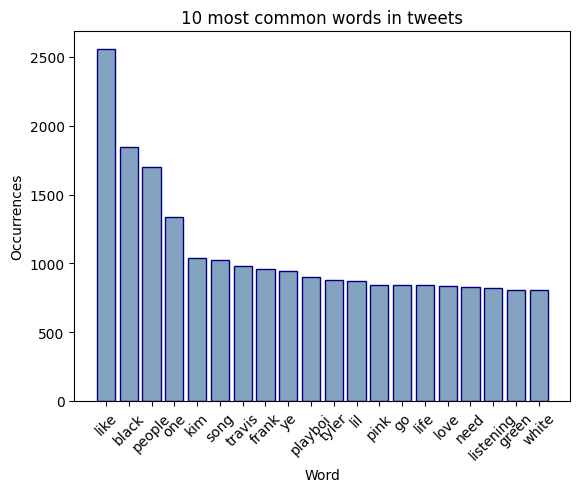

In [14]:
def most_common_words(data):
    flattened_words = [word for sublist in data for word in sublist if word.lower() not in ["kanye", "west"]]
    word_counts = Counter(flattened_words)
    top_10_words = word_counts.most_common(20)

    words, counts = zip(*top_10_words)

    plt.title('10 most common words in tweets')
    plt.xlabel('Word')
    plt.ylabel('Occurrences')

    plt.bar(words, counts, color=(0.2, 0.4, 0.6, 0.6), edgecolor='navy')
    plt.xticks(rotation=45)
    plt.show()

most_common_words(df["Lemmantized_Tweets"])

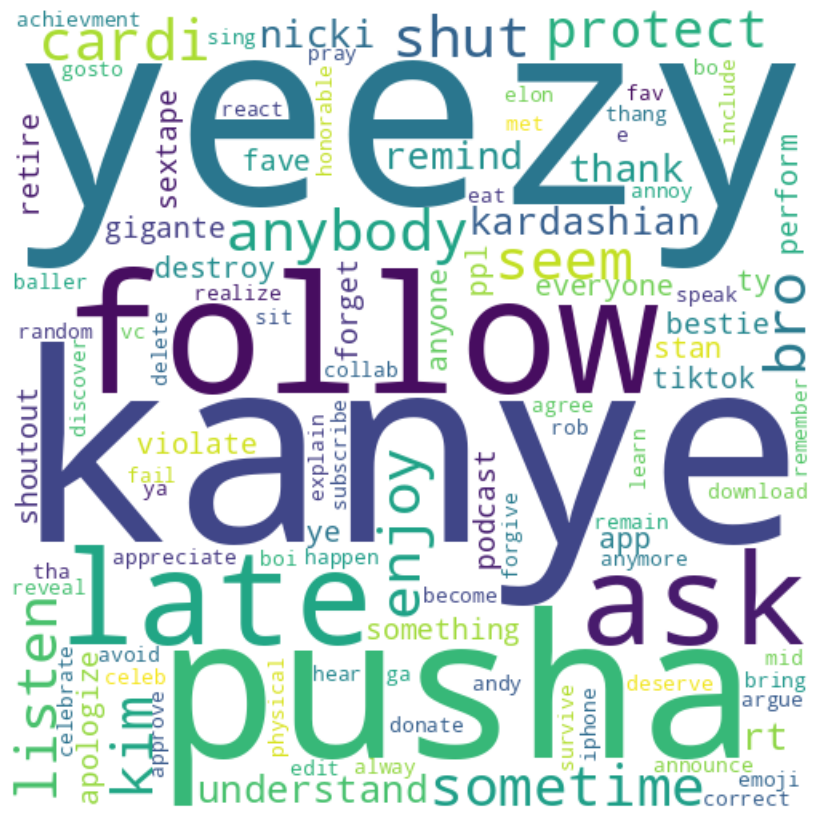

In [15]:
def generate_wordcloud(data):
    word_counts = Counter([word for sublist in data for word in sublist])
    word_frequencies = {word: count for word, count in word_counts.items()}

    text = ' '.join([word + ' ' + str(count) for word, count in word_frequencies.items()])

    custom_stopwords = set(STOPWORDS)
    custom_stopwords.add("u")

    word_frequencies = {word: count for word, count in word_counts.items() if word not in custom_stopwords}

    wordcloud = WordCloud(width=500, height=500, background_color='white', colormap='viridis', min_font_size=10, stopwords=custom_stopwords).generate(text)

    return wordcloud
    
wc = generate_wordcloud(df["Lemmantized_Tweets"])
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

There's plenty of words that relates to Kanye's brand 'yeezy', family 'kardashian' and music industry such as 'listen' or 'nicki'.

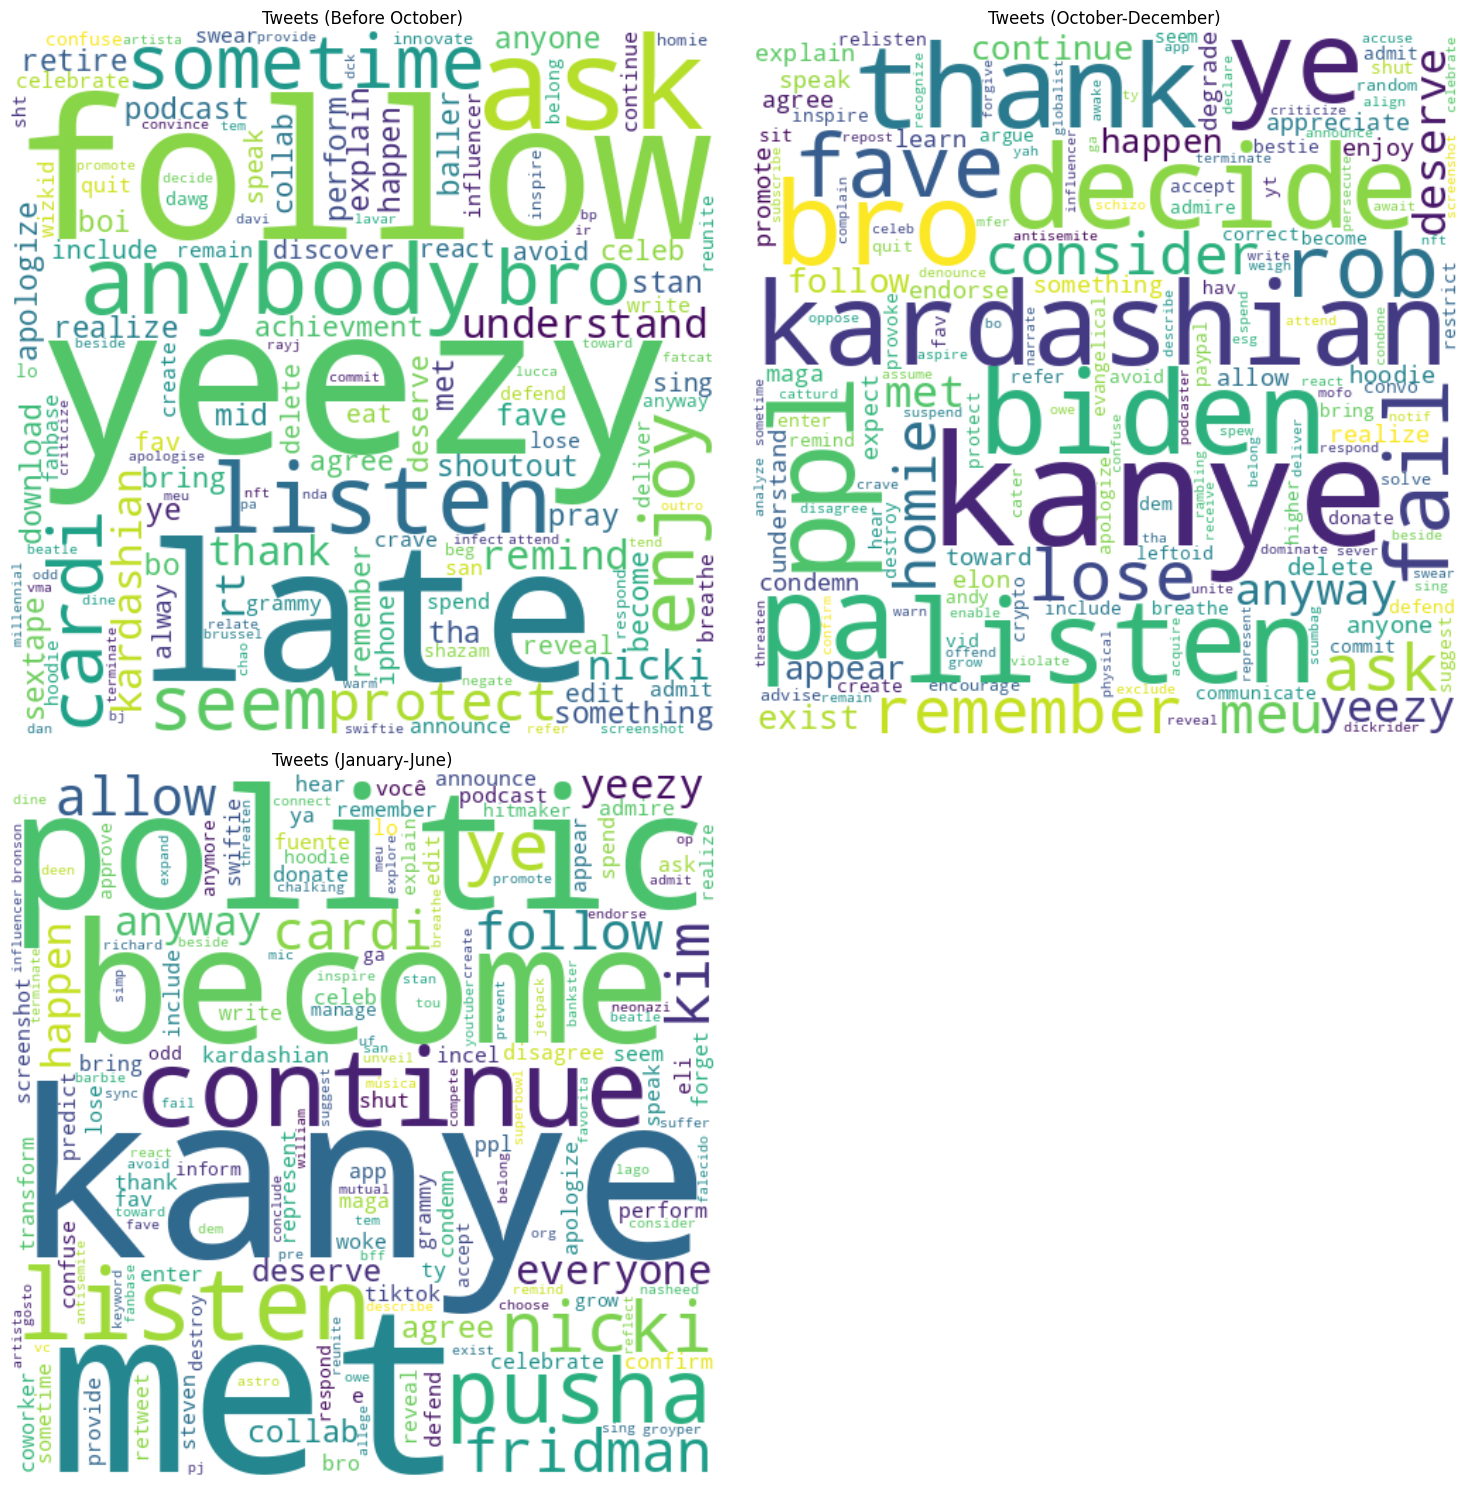

In [16]:
before_oct_tweets = df['Lemmantized_Tweets'][df['Date'] < '2022-10-01']
wc_before_oct = generate_wordcloud(before_oct_tweets)

oct_dec_tweets = df['Lemmantized_Tweets'][(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31')]
wc_oct_dec = generate_wordcloud(oct_dec_tweets)

jan_jun_tweets = df['Lemmantized_Tweets'][(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01')]
wc_jan_jun = generate_wordcloud(jan_jun_tweets)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].imshow(wc_before_oct, interpolation='bilinear')
axs[0, 0].set_title('Tweets (Before October)')
axs[0, 0].axis('off')

axs[0, 1].imshow(wc_oct_dec, interpolation='bilinear')
axs[0, 1].set_title('Tweets (October-December)')
axs[0, 1].axis('off')

axs[1, 0].imshow(wc_jan_jun, interpolation='bilinear')
axs[1, 0].set_title('Tweets (January-June)')
axs[1, 0].axis('off')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

It can be observed that during a period of contentious statements, there was a reference made to the last name of the President of the United States, which was associated with controversial remarks made on October 19th. Moreover, I have observed a greater prevalence of negative words during certain periods compared to others - such as 'lose' or 'fail'.

In [17]:
sentiment_intensity_analyzer = SentimentIntensityAnalyzer()

def sentiment_criteria(row):
    sia = sentiment_intensity_analyzer.polarity_scores(" ".join(row["Lemmantized_Tweets"]))
    row['positive'] = sia['pos']
    row['neutral'] = sia['neu']
    row['negative'] = sia['neg']
    row['compound'] = sia['compound']
    return row

df = df.apply(lambda row: sentiment_criteria(row), axis=1)

In [18]:
df.head()

Date  \
0  2022-08-01 23:59:32+00:00   
1  2022-08-01 23:59:00+00:00   
2  2022-08-01 23:57:27+00:00   
4  2022-08-01 23:54:07+00:00   
5  2022-08-01 23:51:24+00:00   

                                             Content  \
0  runaway by kanye west is one of the greatest h...   
1            kanye west feat x swizz beatz power rmx   
2  bmth placebo the beatles blur brockhampton kan...   
4    id pay a rack to chill with for minutes any day   
5  the pissed put of coffee add of and of sour gu...   

                                   Tokenized_Content  \
0  [runaway, by, kanye, west, is, one, of, the, g...   
1   [kanye, west, feat, x, swizz, beatz, power, rmx]   
2  [bmth, placebo, the, beatles, blur, brockhampt...   
4  [id, pay, a, rack, to, chill, with, for, minut...   
5  [the, pissed, put, of, coffee, add, of, and, o...   

                                  Lemmantized_Tweets  positive  neutral  \
0  [runaway, kanye, west, one, greatest, hip, hop...     0.318    0.682   
1   [kanye, west, feat, x, swizz, beatz, power, rmx]     0.000    1.000   
2  [bmth, placebo, beatles, blur, brockhampton, k...     0.000    0.872   
4                [id, pay, rack, chill, minute, day]     0.000    0.781   
5  [pissed, put, coffee, add, sour, gulp, like, b...     0.197    0.472   

   negative  compound  
0     0.000    0.6369  
1     0.000    0.0000  
2     0.128   -0.2960  
4     0.219   -0.1027  
5     0.331   -0.4019

##### sentiment differece within time period

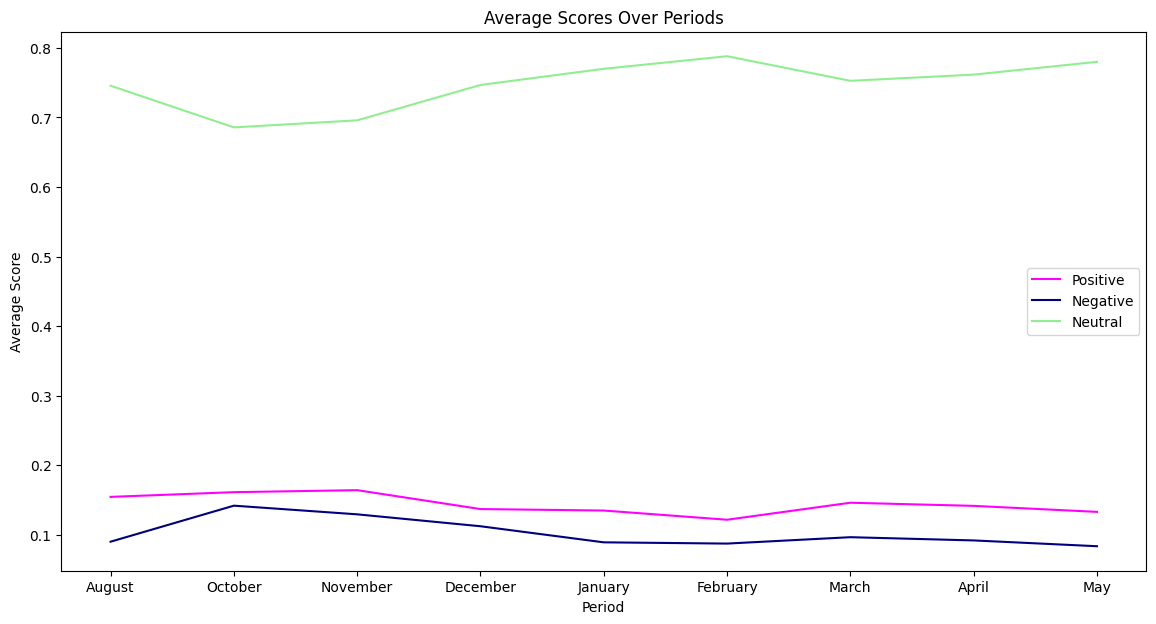

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df['Period'] = pd.cut(df['Date'],
                      bins=[pd.to_datetime('2022-08-01'), pd.to_datetime('2022-10-01'), pd.to_datetime('2022-11-01'), pd.to_datetime('2022-12-01'), pd.to_datetime('2023-01-01'), pd.to_datetime('2023-02-01'), pd.to_datetime('2023-03-01'), pd.to_datetime('2023-04-01'), pd.to_datetime('2023-05-01'), pd.to_datetime('2023-06-01')],
                      labels=['August', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May'])

df_grouped = df.groupby('Period')[['positive', 'negative', 'neutral']].mean()

period_order = ['August', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
plt.figure(figsize=(14, 7))

plt.plot(df_grouped.index, df_grouped['positive'], label='Positive', color="magenta")
plt.plot(df_grouped.index, df_grouped['negative'], label='Negative', color="navy")
plt.plot(df_grouped.index, df_grouped['neutral'], label='Neutral', color="lightgreen")

plt.legend(loc='best')

plt.title('Average Scores Over Periods')
plt.xlabel('Period')
plt.ylabel('Average Score')
plt.show()


The neutrality of tweets decreased with the onset of a series of controversial statements by Kanye. Positive statements decreased during this period, while negative statements were more prevalent only at the beginning of October and gradually decreased in intensity thereafter.

The next chart depicts the significant shift in public sentiment towards Kanye since the beginning of October, as positive sentiments declined and users on Twitter increasingly leaned towards negative opinions due to Kanye's harmful statements.

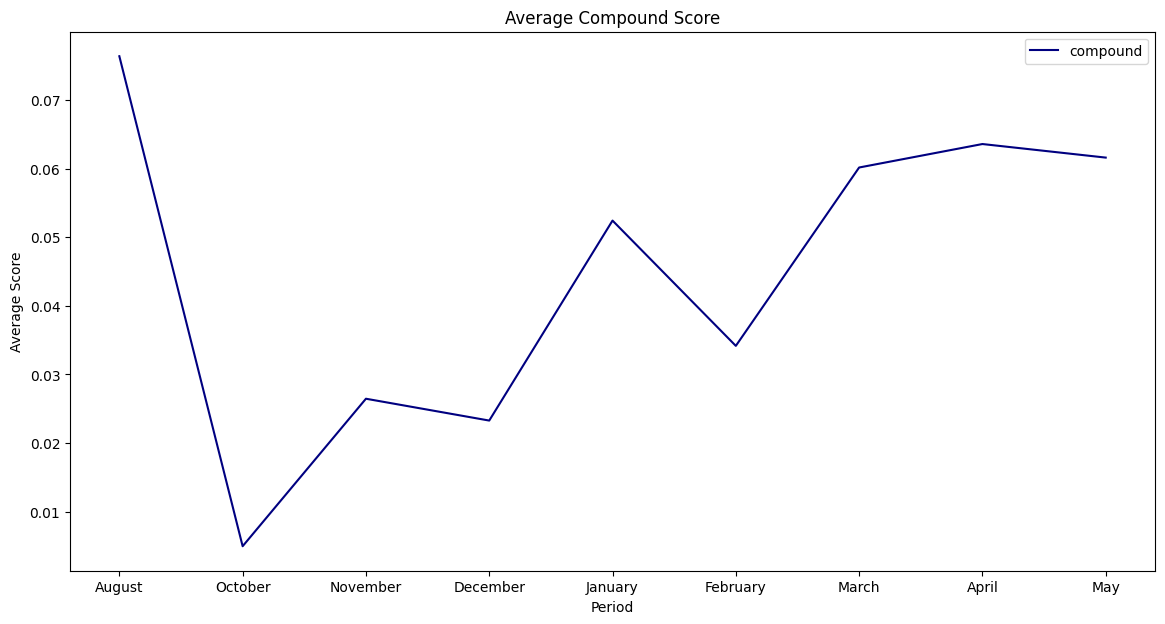

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df['Period'] = pd.cut(df['Date'],
                      bins=[pd.to_datetime('2022-08-01'), pd.to_datetime('2022-10-01'), pd.to_datetime('2022-11-01'), pd.to_datetime('2022-12-01'), pd.to_datetime('2023-01-01'), pd.to_datetime('2023-02-01'), pd.to_datetime('2023-03-01'), pd.to_datetime('2023-04-01'), pd.to_datetime('2023-05-01'), pd.to_datetime('2023-06-01')],
                      labels=['August', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May'])

df_grouped = df.groupby('Period')[['compound']].mean()

period_order = ['August', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
plt.figure(figsize=(14, 7))

plt.plot(df_grouped.index, df_grouped['compound'], label='compound', color="navy")

plt.legend(loc='best')

plt.title('Average Compound Score')
plt.xlabel('Period')
plt.ylabel('Average Score')
plt.show()


In [21]:
df

Date  \
0     2022-08-01 23:59:32+00:00   
1     2022-08-01 23:59:00+00:00   
2     2022-08-01 23:57:27+00:00   
4     2022-08-01 23:54:07+00:00   
5     2022-08-01 23:51:24+00:00   
...                         ...   
11513 2023-05-24 21:16:24+00:00   
11514 2023-05-24 21:16:11+00:00   
11515 2023-05-24 21:12:08+00:00   
11516 2023-05-24 21:10:43+00:00   
11517 2023-05-24 21:10:29+00:00   

                                                 Content  \
0      runaway by kanye west is one of the greatest h...   
1                kanye west feat x swizz beatz power rmx   
2      bmth placebo the beatles blur brockhampton kan...   
4        id pay a rack to chill with for minutes any day   
5      the pissed put of coffee add of and of sour gu...   
...                                                  ...   
11513  the song has been no child left behind by kany...   
11514            miley kanye every version of the all of   
11515  his pathetic defense of the drag reminds me of...   
11516  to cantando flashing lights do kanye west tem ...   
11517  how different would life be if kanye west neve...   

                                       Tokenized_Content  \
0      [runaway, by, kanye, west, is, one, of, the, g...   
1       [kanye, west, feat, x, swizz, beatz, power, rmx]   
2      [bmth, placebo, the, beatles, blur, brockhampt...   
4      [id, pay, a, rack, to, chill, with, for, minut...   
5      [the, pissed, put, of, coffee, add, of, and, o...   
...                                                  ...   
11513  [the, song, has, been, no, child, left, behind...   
11514   [miley, kanye, every, version, of, the, all, of]   
11515  [his, pathetic, defense, of, the, drag, remind...   
11516  [to, cantando, flashing, lights, do, kanye, we...   
11517  [how, different, would, life, be, if, kanye, w...   

                                      Lemmantized_Tweets  positive  neutral  \
0      [runaway, kanye, west, one, greatest, hip, hop...     0.318    0.682   
1       [kanye, west, feat, x, swizz, beatz, power, rmx]     0.000    1.000   
2      [bmth, placebo, beatles, blur, brockhampton, k...     0.000    0.872   
4                    [id, pay, rack, chill, minute, day]     0.000    0.781   
5      [pissed, put, coffee, add, sour, gulp, like, b...     0.197    0.472   
...                                                  ...       ...      ...   
11513   [song, child, left, behind, kanye, west, listen]     0.000    1.000   
11514                     [miley, kanye, every, version]     0.000    1.000   
11515  [pathetic, defense, drag, reminds, kanye, hitl...     0.115    0.458   
11516  [cantando, flashing, light, kanye, west, tem, ...     0.000    1.000   
11517        [different, life, kanye, west, never, went]     0.000    1.000   

       negative  compound  Period  
0         0.000    0.6369  August  
1         0.000    0.0000  August  
2         0.128   -0.2960  August  
4         0.219   -0.1027  August  
5         0.331   -0.4019  August  
...         ...       ...     ...  
11513     0.000    0.0000     May  
11514     0.000    0.0000     May  
11515     0.427   -0.6249     May  
11516     0.000    0.0000     May  
11517     0.000    0.0000     May  

[35052 rows x 9 columns]

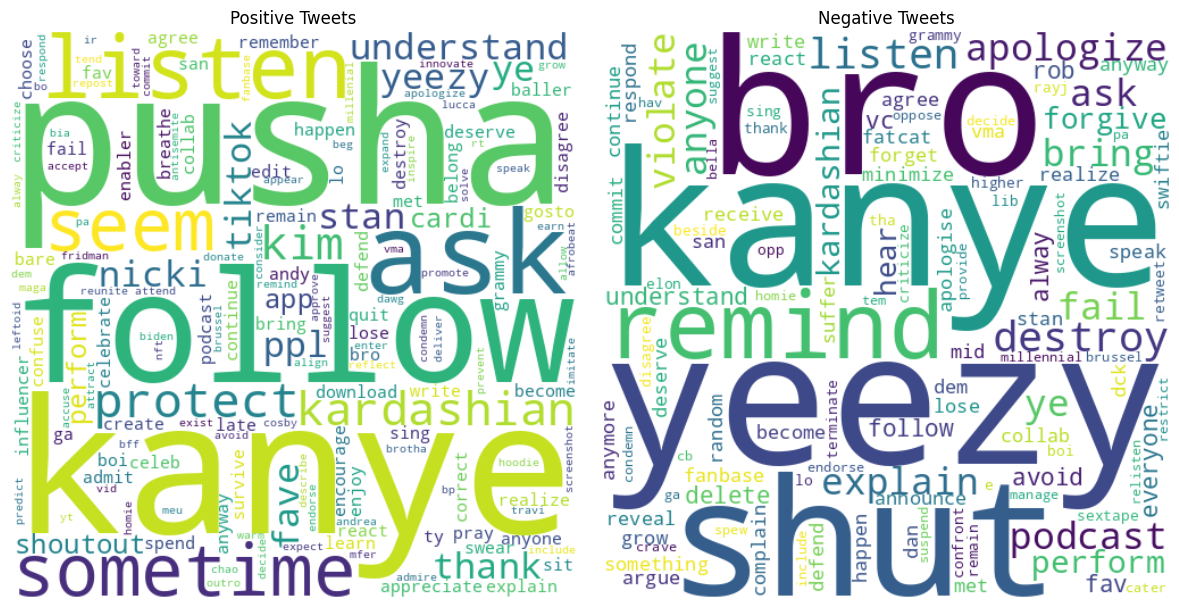

In [22]:
wc_positive = generate_wordcloud(df['Lemmantized_Tweets'][df['positive'] > df['negative']])
wc_negative = generate_wordcloud(df['Lemmantized_Tweets'][df['positive'] < df['negative']])


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(wc_positive, interpolation='bilinear')
axs[0].set_title('Positive Tweets')
axs[0].axis('off')

axs[1].imshow(wc_negative, interpolation='bilinear')
axs[1].set_title('Negative Tweets')
axs[1].axis('off')

plt.tight_layout()
plt.show()

Positive tweets mainly originate from fans of Kanye West's work, as he is widely regarded as a brilliant artist. The vocabulary used in these tweets is predominantly associated with his career and artistic achievements.

In addition to the positive tweets related to Kanye West, there are mentions of other artists' names and pseudonyms as well.
It is also possible that the inclusion of other artists' names and pseudonyms in tweets could be due to informational tweets regarding business-related matters.

The presence of words like "apologize" in negative tweets suggests that people have certain expectations from Kanye. Additionally, words such as "violate" and "destroy" are fitting descriptions of the harmful nature of Kanye's statements.

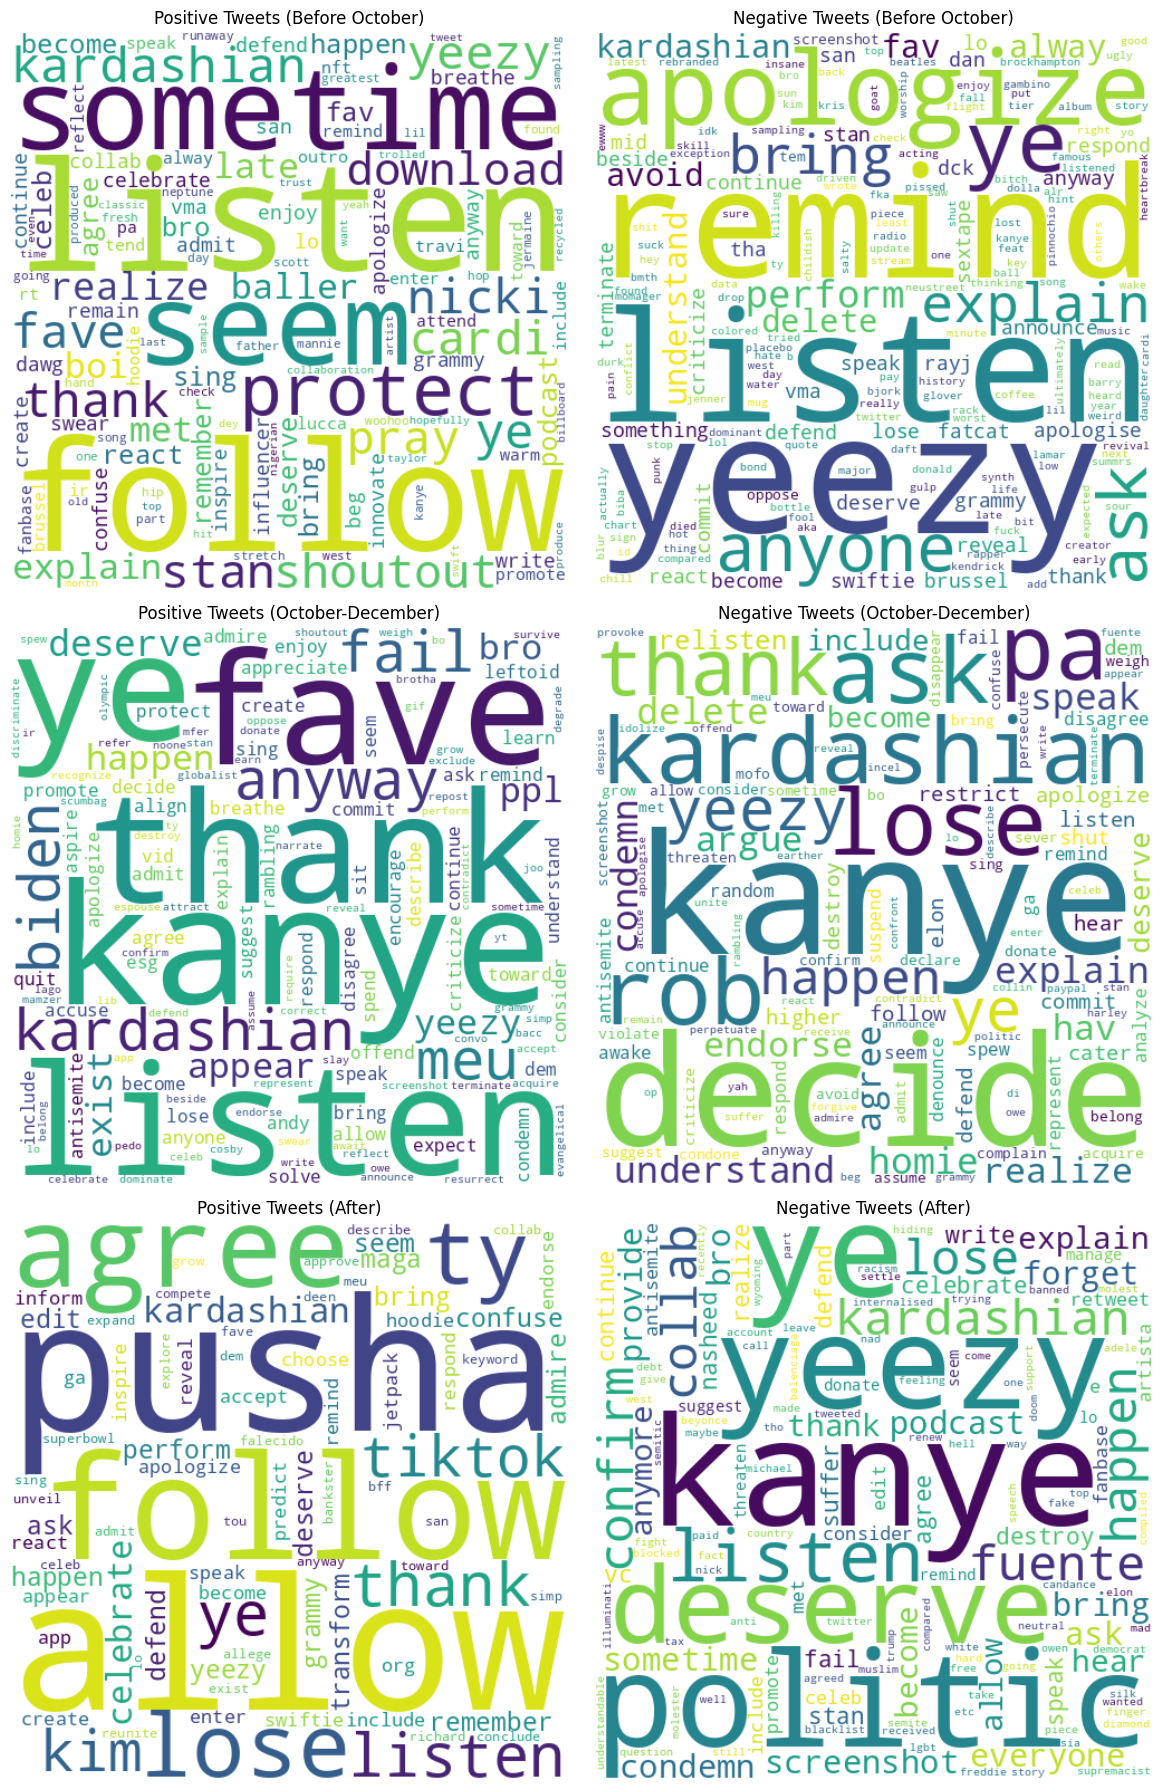

In [23]:
wc_before_positive = generate_wordcloud(df['Lemmantized_Tweets'][(df['Date'] < '2022-10-01') & (df['positive'] > df['negative'])])
wc_before_negative = generate_wordcloud(df['Lemmantized_Tweets'][(df['Date'] < '2022-10-01') & (df['positive'] < df['negative'])])

wc_oct_dec_positive = generate_wordcloud(df['Lemmantized_Tweets'][(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['positive'] > df['negative'])])
wc_oct_dec_negative = generate_wordcloud(df['Lemmantized_Tweets'][(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['positive'] < df['negative'])])

wc_jan_jun_positive = generate_wordcloud(df['Lemmantized_Tweets'][(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['positive'] > df['negative'])])
wc_jan_jun_negative = generate_wordcloud(df['Lemmantized_Tweets'][(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['positive'] < df['negative'])])

fig, axs = plt.subplots(3, 2, figsize=(12, 18))

axs[0, 0].imshow(wc_before_positive, interpolation='bilinear')
axs[0, 0].set_title('Positive Tweets (Before October)')
axs[0, 0].axis('off')

axs[0, 1].imshow(wc_before_negative, interpolation='bilinear')
axs[0, 1].set_title('Negative Tweets (Before October)')
axs[0, 1].axis('off')

axs[1, 0].imshow(wc_oct_dec_positive, interpolation='bilinear')
axs[1, 0].set_title('Positive Tweets (October-December)')
axs[1, 0].axis('off')

axs[1, 1].imshow(wc_oct_dec_negative, interpolation='bilinear')
axs[1, 1].set_title('Negative Tweets (October-December)')
axs[1, 1].axis('off')

axs[2, 0].imshow(wc_jan_jun_positive, interpolation='bilinear')
axs[2, 0].set_title('Positive Tweets (After)')
axs[2, 0].axis('off')

axs[2, 1].imshow(wc_jan_jun_negative, interpolation='bilinear')
axs[2, 1].set_title('Negative Tweets (After)')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

Over time, you can observe how the nature of users' tweets changes, and they may primarily focus on various topics.
In the negative opinions during that period, the presence of the word "antisemite" can be observed.

In [24]:
def emotion_criteria(row):
    emotion = te.get_emotion(" ".join(row["Lemmantized_Tweets"]))
    row['Happy'] = emotion['Happy']
    row['Angry'] = emotion['Angry']
    row['Surprise'] = emotion['Surprise']
    row['Sad'] = emotion['Sad']
    row['Fear'] = emotion['Fear']
    return row

df = df.apply(lambda row: emotion_criteria(row), axis=1)

In [25]:
df

Date  \
0     2022-08-01 23:59:32+00:00   
1     2022-08-01 23:59:00+00:00   
2     2022-08-01 23:57:27+00:00   
4     2022-08-01 23:54:07+00:00   
5     2022-08-01 23:51:24+00:00   
...                         ...   
11513 2023-05-24 21:16:24+00:00   
11514 2023-05-24 21:16:11+00:00   
11515 2023-05-24 21:12:08+00:00   
11516 2023-05-24 21:10:43+00:00   
11517 2023-05-24 21:10:29+00:00   

                                                 Content  \
0      runaway by kanye west is one of the greatest h...   
1                kanye west feat x swizz beatz power rmx   
2      bmth placebo the beatles blur brockhampton kan...   
4        id pay a rack to chill with for minutes any day   
5      the pissed put of coffee add of and of sour gu...   
...                                                  ...   
11513  the song has been no child left behind by kany...   
11514            miley kanye every version of the all of   
11515  his pathetic defense of the drag reminds me of...   
11516  to cantando flashing lights do kanye west tem ...   
11517  how different would life be if kanye west neve...   

                                       Tokenized_Content  \
0      [runaway, by, kanye, west, is, one, of, the, g...   
1       [kanye, west, feat, x, swizz, beatz, power, rmx]   
2      [bmth, placebo, the, beatles, blur, brockhampt...   
4      [id, pay, a, rack, to, chill, with, for, minut...   
5      [the, pissed, put, of, coffee, add, of, and, o...   
...                                                  ...   
11513  [the, song, has, been, no, child, left, behind...   
11514   [miley, kanye, every, version, of, the, all, of]   
11515  [his, pathetic, defense, of, the, drag, remind...   
11516  [to, cantando, flashing, lights, do, kanye, we...   
11517  [how, different, would, life, be, if, kanye, w...   

                                      Lemmantized_Tweets  positive  neutral  \
0      [runaway, kanye, west, one, greatest, hip, hop...     0.318    0.682   
1       [kanye, west, feat, x, swizz, beatz, power, rmx]     0.000    1.000   
2      [bmth, placebo, beatles, blur, brockhampton, k...     0.000    0.872   
4                    [id, pay, rack, chill, minute, day]     0.000    0.781   
5      [pissed, put, coffee, add, sour, gulp, like, b...     0.197    0.472   
...                                                  ...       ...      ...   
11513   [song, child, left, behind, kanye, west, listen]     0.000    1.000   
11514                     [miley, kanye, every, version]     0.000    1.000   
11515  [pathetic, defense, drag, reminds, kanye, hitl...     0.115    0.458   
11516  [cantando, flashing, light, kanye, west, tem, ...     0.000    1.000   
11517        [different, life, kanye, west, never, went]     0.000    1.000   

       negative  compound  Period  Happy  Angry  Surprise   Sad  Fear  
0         0.000    0.6369  August   0.00   0.00       0.0  1.00  0.00  
1         0.000    0.0000  August   0.00   1.00       0.0  0.00  0.00  
2         0.128   -0.2960  August   0.00   0.00       1.0  0.00  0.00  
4         0.219   -0.1027  August   0.33   0.00       0.0  0.33  0.33  
5         0.331   -0.4019  August   0.00   0.33       0.0  0.67  0.00  
...         ...       ...     ...    ...    ...       ...   ...   ...  
11513     0.000    0.0000     May   0.00   0.00       0.0  0.00  0.00  
11514     0.000    0.0000     May   0.00   0.00       0.0  0.00  0.00  
11515     0.427   -0.6249     May   0.00   0.00       0.0  0.33  0.67  
11516     0.000    0.0000     May   0.00   0.00       0.0  0.00  0.00  
11517     0.000    0.0000     May   0.00   0.00       0.0  0.00  1.00  

[35052 rows x 14 columns]

##### emotions differece within time period

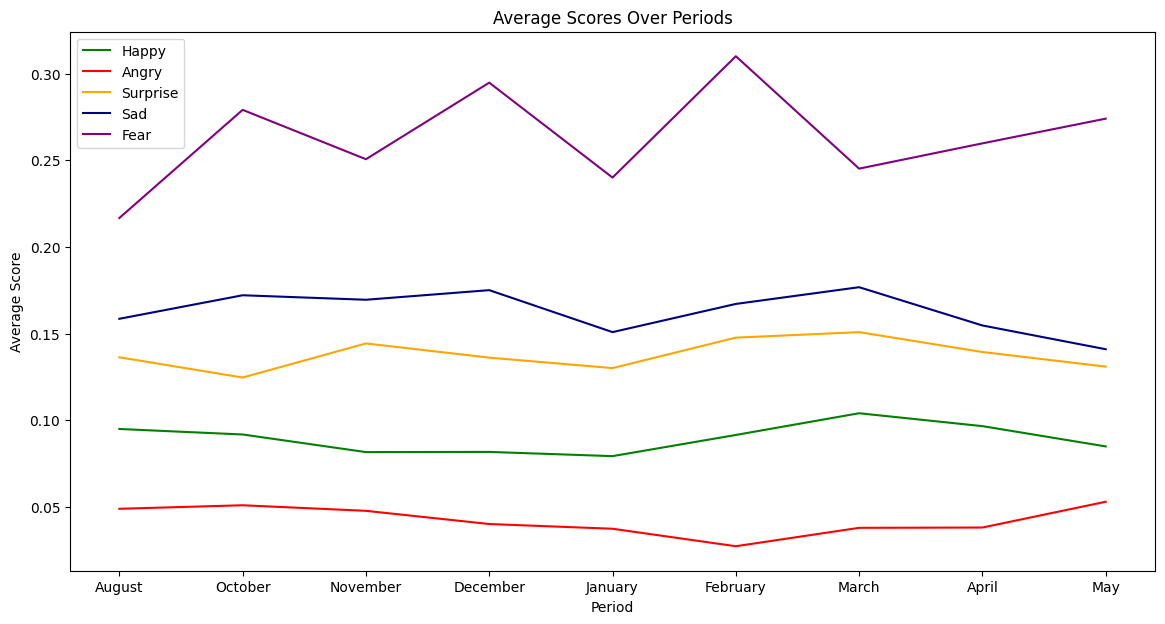

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

df['Period'] = pd.cut(df['Date'],
                      bins=[pd.to_datetime('2022-08-01'), pd.to_datetime('2022-10-01'), pd.to_datetime('2022-11-01'), pd.to_datetime('2022-12-01'), pd.to_datetime('2023-01-01'), pd.to_datetime('2023-02-01'), pd.to_datetime('2023-03-01'), pd.to_datetime('2023-04-01'), pd.to_datetime('2023-05-01'), pd.to_datetime('2023-06-01')],
                      labels=['August', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May'])

df_grouped = df.groupby('Period')[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].mean()

period_order = ['August', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
plt.figure(figsize=(14, 7))

plt.plot(df_grouped.index, df_grouped['Happy'], label='Happy', color="green")
plt.plot(df_grouped.index, df_grouped['Angry'], label='Angry', color="red")
plt.plot(df_grouped.index, df_grouped['Surprise'], label='Surprise', color="orange")
plt.plot(df_grouped.index, df_grouped['Sad'], label='Sad', color="navy")
plt.plot(df_grouped.index, df_grouped['Fear'], label='Fear', color="purple")

plt.legend(loc='best')

plt.title('Average Scores Over Periods')
plt.xlabel('Period')
plt.ylabel('Average Score')
plt.show()

When it comes to emotions, the dominant emotion seems to be fear. This might be related to the uncertainty surrounding Kanye's actions, especially considering his known struggle with bipolar disorder and his openness about not taking medication. Kanye West's statements can instil fear among his fans who idolise him, as they may not want to witness  his personal struggles or prefer to separate his artistic work from his controversial words, opting to keep a distance. 

Some expressions of fear may be related to defenders of Kanye who wish to protect what they perceive as freedom of speech. The three peaks in the fear curve are associated with Kanye West's most controversial behaviors.

Interestingly, anger has decreased, while sadness has increased.

Each intensification of emotions has decreased after a tumultuous period, approaching neutrality.

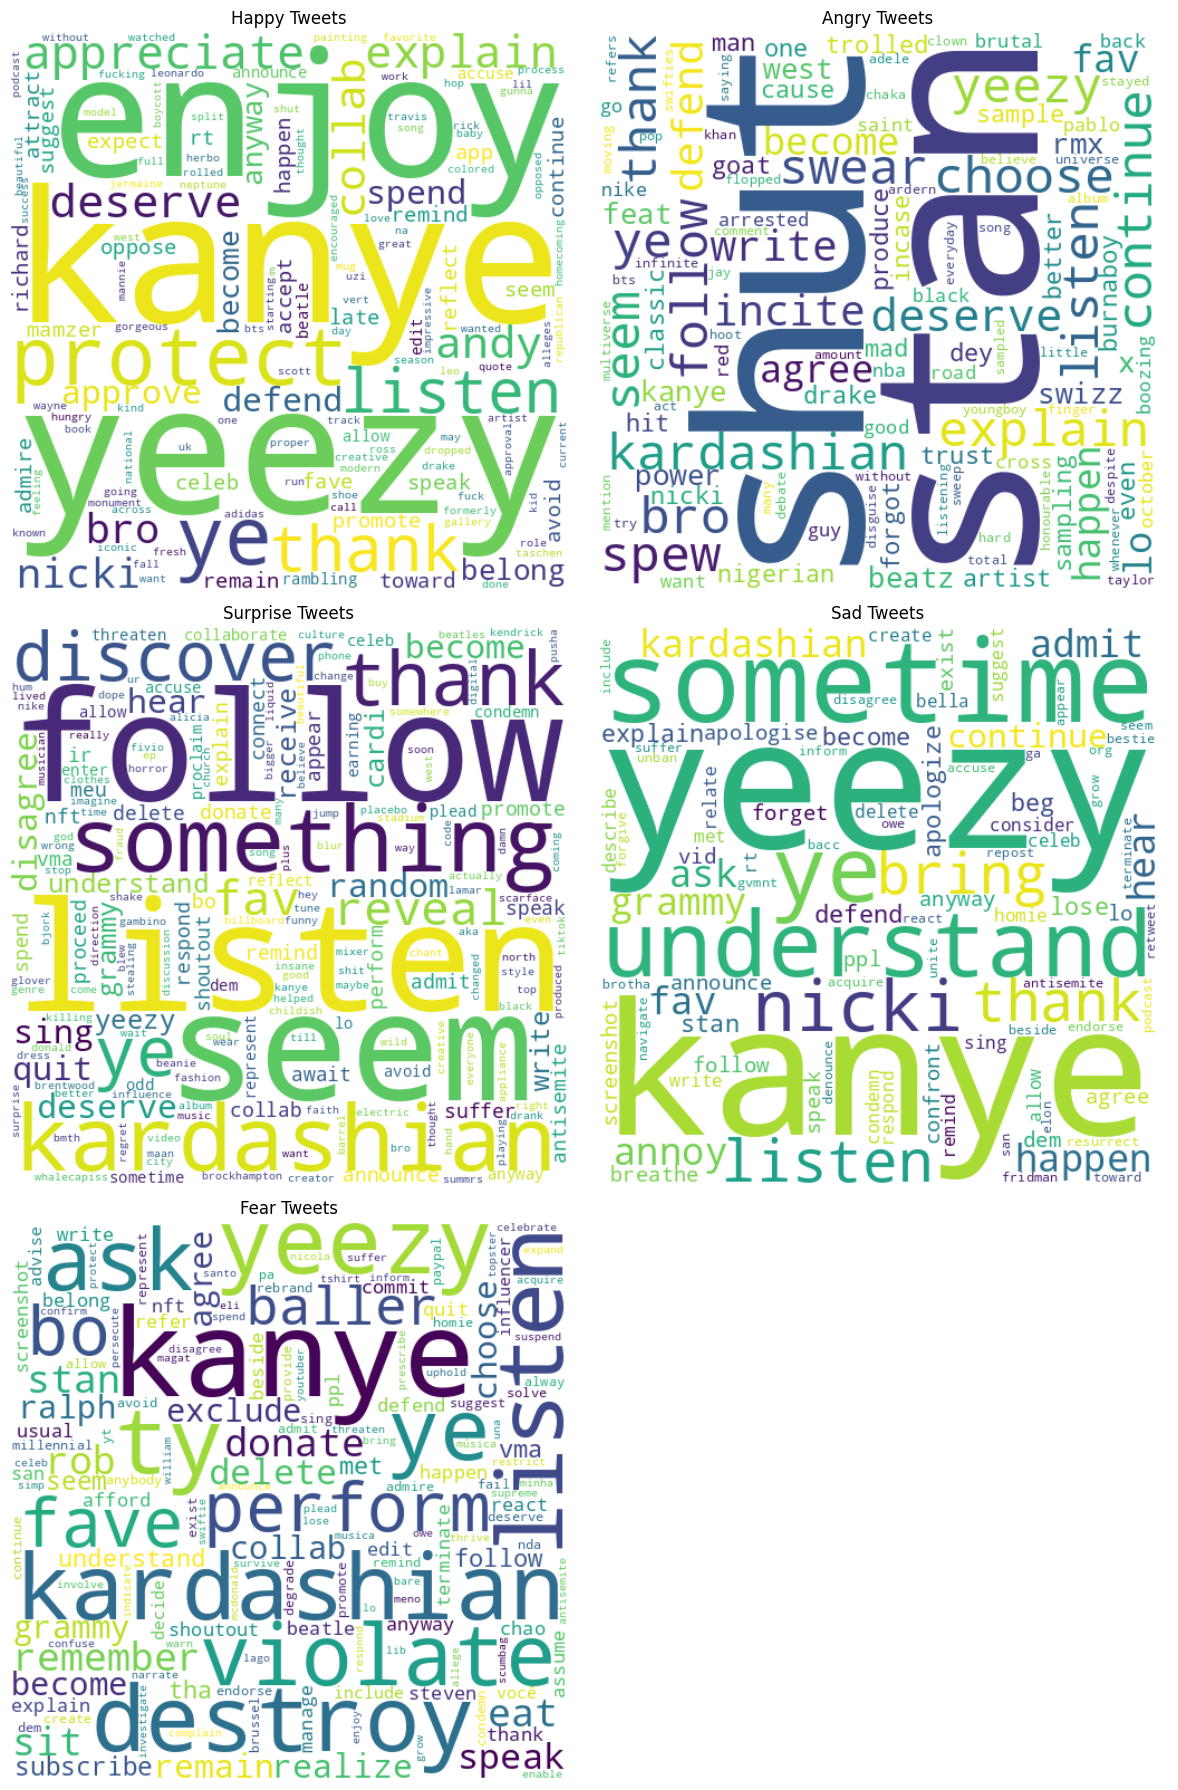

In [27]:
filtered_max_happy = df[(df['Happy'] > df['Angry']) & (df['Happy'] > df['Surprise']) & (df['Happy'] > df['Sad']) & (df['Happy'] > df['Fear'])]
filtered_max_angry = df[(df['Angry'] > df['Happy']) & (df['Angry'] > df['Surprise']) & (df['Angry'] > df['Sad']) & (df['Angry'] > df['Fear'])]
filtered_max_surprise = df[(df['Surprise'] > df['Happy']) & (df['Surprise'] > df['Angry']) & (df['Surprise'] > df['Sad']) & (df['Surprise'] > df['Fear'])]
filtered_max_sad = df[(df['Sad'] > df['Happy']) & (df['Sad'] > df['Surprise']) & (df['Sad'] > df['Angry']) & (df['Sad'] > df['Fear'])]
filtered_max_fear = df[(df['Fear'] > df['Happy']) & (df['Fear'] > df['Surprise']) & (df['Fear'] > df['Sad']) & (df['Fear'] > df['Angry'])]

wc_happy = generate_wordcloud(filtered_max_happy['Lemmantized_Tweets'])
wc_angry = generate_wordcloud(filtered_max_angry['Lemmantized_Tweets'])
wc_surprise = generate_wordcloud(filtered_max_surprise['Lemmantized_Tweets'])
wc_sad = generate_wordcloud(filtered_max_sad['Lemmantized_Tweets'])
wc_fear = generate_wordcloud(filtered_max_fear['Lemmantized_Tweets'])

fig, axs = plt.subplots(3, 2, figsize=(12, 18))
axs[0, 0].imshow(wc_happy, interpolation='bilinear')
axs[0, 0].set_title('Happy Tweets')
axs[0, 0].axis('off')

axs[0, 1].imshow(wc_angry, interpolation='bilinear')
axs[0, 1].set_title('Angry Tweets')
axs[0, 1].axis('off')

axs[1, 0].imshow(wc_surprise, interpolation='bilinear')
axs[1, 0].set_title('Surprise Tweets')
axs[1, 0].axis('off')

axs[1, 1].imshow(wc_sad, interpolation='bilinear')
axs[1, 1].set_title('Sad Tweets')
axs[1, 1].axis('off')

axs[2, 0].imshow(wc_fear, interpolation='bilinear')
axs[2, 0].set_title('Fear Tweets')
axs[2, 0].axis('off')

axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


- Happy tweets mainly revolve around music, as well as praising the defense of family or freedom of speech.
- Angry tweets contain words like 'deserve' or 'bully'.
- Surprise tweets include words like 'collab' and 'discover', which evoke positive emotions related to new creations. However, words like 'condemn' and 'threaten' can also be surprising, as people may be taken aback by such behavior.
- Sad tweets often mention 'Kardashian', with many expressing sympathy for Kanye's ex-wife and their children, who have to witness his behavior. Words like 'condemn', 'apologize', and 'defend' indicate a sense of resignation. Users like Jamie Lee Curtis may be saddened that someone with Kanye's platform could address important topics in an inappropriate manner, leading to the condemnation of his behavior.
- Fear tweets include words like 'destroy', suggesting that fans may fear for his career and the value of his brand, which suddenly lost its worth. Some individuals may have concerns about the direction in which Kanye is headed.

In [28]:
def compare_sentiment(positive, negative, neutral):
    len_positive = len(positive)
    len_negative = len(negative)
    len_neutral = len(neutral)
    
    total = len_positive + len_negative + len_neutral
    
    positive = (len_positive / total) * 100
    negative = (len_negative / total) * 100
    neutral = (len_neutral / total) * 100
    
    print(f'Positive: {positive:.2f}%')
    print(f'Negative: {negative:.2f}%')
    print(f'Neutral: {neutral:.2f}%')


filtered_max_positive = df[(df['positive'] > df['negative']) & (df['positive'] > df['neutral'])]
filtered_max_negative = df[(df['negative'] > df['positive']) & (df['negative'] > df['neutral'])]
filtered_max_neutral = df[(df['neutral'] > df['positive']) & (df['neutral'] > df['negative'])]

compare_sentiment(filtered_max_positive, filtered_max_negative, filtered_max_neutral)

Positive: 8.55%
Negative: 6.03%
Neutral: 85.42%


The majority of tweets exhibit a neutral tone, which could be attributed to informational tweets focused on updates such as new music releases, without necessarily expressing opinions on various events.

In [39]:
print("Before")
compare_sentiment(df[(df['Date'] < '2022-10-01') & (df['positive'] > df['negative']) & (df['positive'] > df['neutral'])], 
                  df[(df['Date'] < '2022-10-01') &(df['Date'] < '2022-10-01') & (df['positive'] < df['negative'])],
                  df[(df['Date'] < '2022-10-01') & ((df['Date'] < '2022-10-01') & df['neutral'] > df['positive']) & (df['neutral'] > df['negative'])])
print("During")
compare_sentiment(df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['positive'] > df['negative']) & (df['positive'] > df['neutral'])], 
                  df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['positive'] < df['negative'])],
                  df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['neutral'] > df['positive']) & (df['neutral'] > df['negative'])])
print("After")
compare_sentiment(df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['positive'] > df['negative']) & (df['positive'] > df['neutral'])], 
                  df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01')& (df['positive'] < df['negative'])],
                  df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['neutral'] > df['positive']) & (df['neutral'] > df['negative'])])

Before
Positive: 7.58%
Negative: 17.22%
Neutral: 75.20%
During
Positive: 7.58%
Negative: 24.32%
Neutral: 68.10%
After
Positive: 5.48%
Negative: 19.75%
Neutral: 74.77%


It can be observed that there was an increase in negative tweets during the period mentioned in the article. Later on, there was a shift, and the number of neutral tweets started to rise.

In [29]:
def compare_emotions(happy, angry, surprise, sad, fear):
    len_happy = len(happy)
    len_angry = len(angry)
    len_surprise = len(surprise)
    len_sad = len(sad)
    len_fear = len(fear)
    
    total = len_happy + len_angry + len_surprise + len_sad + len_fear
    
    happy_percent = (len_happy / total) * 100
    angry_percent = (len_angry / total) * 100
    surprise_percent = (len_surprise / total) * 100
    sad_percent = (len_sad / total) * 100
    fear_percent = (len_fear / total) * 100
    
    print(f'Happy: {happy_percent:.2f}%')
    print(f'Angry: {angry_percent:.2f}%')
    print(f'Surprise: {surprise_percent:.2f}%')
    print(f'Sad: {sad_percent:.2f}%')
    print(f'Fear: {fear_percent:.2f}%')

compare_emotions(filtered_max_happy, filtered_max_angry, filtered_max_surprise, filtered_max_sad, filtered_max_fear)


Happy: 11.54%
Angry: 4.99%
Surprise: 17.63%
Sad: 22.78%
Fear: 43.06%


In [41]:
filtered_max_happy_before = df[(df['Date'] < '2022-10-01') & (df['Happy'] > df['Angry']) & (df['Happy'] > df['Surprise']) & (df['Happy'] > df['Sad']) & (df['Happy'] > df['Fear'])]
filtered_max_happy_during = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['Happy'] > df['Angry']) & (df['Happy'] > df['Surprise']) & (df['Happy'] > df['Sad']) & (df['Happy'] > df['Fear'])]
filtered_max_happy_after = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['Happy'] > df['Angry']) & (df['Happy'] > df['Surprise']) & (df['Happy'] > df['Sad']) & (df['Happy'] > df['Fear'])]

filtered_max_angry_before = df[(df['Date'] < '2022-10-01') & (df['Angry'] > df['Happy']) & (df['Angry'] > df['Surprise']) & (df['Angry'] > df['Sad']) & (df['Angry'] > df['Fear'])]
filtered_max_angry_during = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['Angry'] > df['Happy']) & (df['Angry'] > df['Surprise']) & (df['Angry'] > df['Sad']) & (df['Angry'] > df['Fear'])]
filtered_max_angry_after = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['Angry'] > df['Happy']) & (df['Angry'] > df['Surprise']) & (df['Angry'] > df['Sad']) & (df['Angry'] > df['Fear'])]

filtered_max_surprise_before = df[(df['Date'] < '2022-10-01') & (df['Surprise'] > df['Happy']) & (df['Surprise'] > df['Angry']) & (df['Surprise'] > df['Sad']) & (df['Surprise'] > df['Fear'])]
filtered_max_surprise_during = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['Surprise'] > df['Happy']) & (df['Surprise'] > df['Angry']) & (df['Surprise'] > df['Sad']) & (df['Surprise'] > df['Fear'])]
filtered_max_surprise_after = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['Surprise'] > df['Happy']) & (df['Surprise'] > df['Angry']) & (df['Surprise'] > df['Sad']) & (df['Surprise'] > df['Fear'])]

filtered_max_sad_before = df[(df['Date'] < '2022-10-01') & (df['Sad'] > df['Happy']) & (df['Sad'] > df['Surprise']) & (df['Sad'] > df['Angry']) & (df['Sad'] > df['Fear'])]
filtered_max_sad_during = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['Sad'] > df['Happy']) & (df['Sad'] > df['Surprise']) & (df['Sad'] > df['Angry']) & (df['Sad'] > df['Fear'])]
filtered_max_sad_after = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['Sad'] > df['Happy']) & (df['Sad'] > df['Surprise']) & (df['Sad'] > df['Angry']) & (df['Sad'] > df['Fear'])]

filtered_max_fear_before = df[(df['Date'] < '2022-10-01') & (df['Fear'] > df['Happy']) & (df['Fear'] > df['Surprise']) & (df['Fear'] > df['Sad']) & (df['Fear'] > df['Angry'])]
filtered_max_fear_during = df[(df['Date'] >= '2022-10-01') & (df['Date'] <= '2022-12-31') & (df['Fear'] > df['Happy']) & (df['Fear'] > df['Surprise']) & (df['Fear'] > df['Sad']) & (df['Fear'] > df['Angry'])]
filtered_max_fear_after = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-06-01') & (df['Fear'] > df['Happy']) & (df['Fear'] > df['Surprise']) & (df['Fear'] > df['Sad']) & (df['Fear'] > df['Angry'])]

print('Before')
compare_emotions(filtered_max_happy_before, filtered_max_angry_before, filtered_max_surprise_before, filtered_max_sad_before, filtered_max_fear_before)
print('During')
compare_emotions(filtered_max_happy_during, filtered_max_angry_during, filtered_max_surprise_during, filtered_max_sad_during, filtered_max_fear_during)
print('After')
compare_emotions(filtered_max_happy_after, filtered_max_angry_after, filtered_max_surprise_after, filtered_max_sad_after, filtered_max_fear_after)

Before
Happy: 14.15%
Angry: 6.34%
Surprise: 19.36%
Sad: 23.07%
Fear: 37.09%
During
Happy: 10.25%
Angry: 4.64%
Surprise: 16.77%
Sad: 23.51%
Fear: 44.84%
After
Happy: 11.18%
Angry: 4.25%
Surprise: 17.39%
Sad: 21.28%
Fear: 45.90%


Interestingly, the emotion of anger has the lowest occurrence. This could be due to the choice of vocabulary used by individuals expressing their opinions, as well as the large number of fans whose statements may outweigh and influence the final outcome.

##### Summary

The majority of tweets regarding Kanye West's persona exhibit a neutral tone, suggesting that he doesn't evoke strong positive or negative emotions in most people. However, this doesn't imply that Kanye himself is indifferent to others. The neutral sentiment may arise due to the significant polarization of user opinions surrounding him. Kanye's persona elicits a wide range of emotions, with fear being the most prevalent. It's important to note that when tweets express anger, it doesn't necessarily mean that users are angry at Kanye himself. Their emotions might be directed towards defending his persona or addressing other individuals or issues entirely. Additionally, while informational tweets contribute to the overall sentiment, it is the diverse range of content and discussions surrounding Kanye that further shape the polarization and emotional responses observed on Twitter.